In [54]:
%pylab inline
import numpy as np
import pycuda.autoinit
import pycuda.driver as drv
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule
import cv2
from PatchMatchCuda import PatchMatch
import time

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [73]:
x = cv2.imread("data/ObjectFolder_touch/36/3_scale_50_color.jpg")  # 4
y = cv2.imread("data/ObjectFolder_touch/36/9_scale_50_color.jpg")  # 7

x = cv2.resize(x,(224,224))
y = cv2.resize(y,(224,224))

x = (x/255).astype(np.float32)
y = (y/255).astype(np.float32)


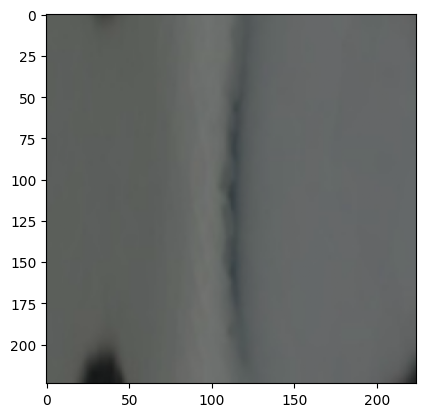

In [74]:
plt.imshow(x)

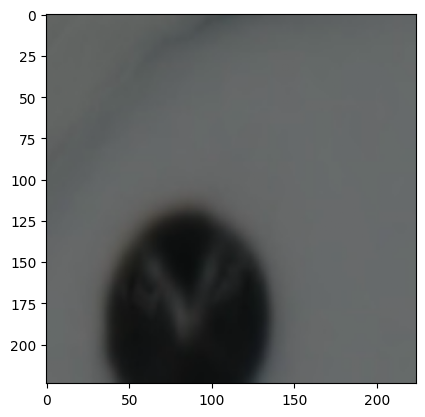

In [75]:
plt.imshow(y)

called


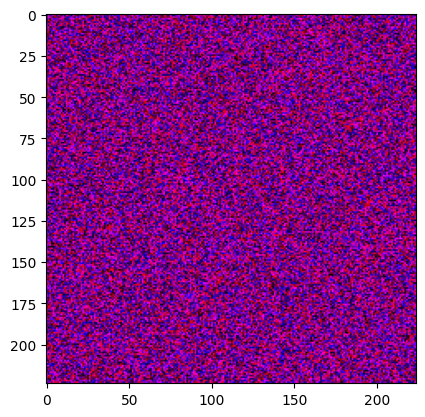

In [76]:
pm = PatchMatch(x,x,y,y, 3)
plt.imshow(pm.visualize())

In [97]:
start = time.time()
pm.propagate(iters=10,rand_search_radius=224)
print(time.time() - start)

0.20912504196166992


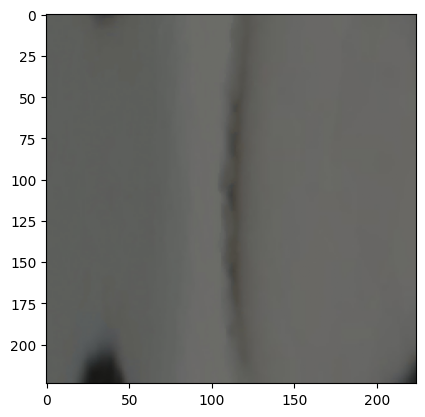

In [50]:
plt.imshow(pm.reconstruct_avg(img=y,patch_size=1)[:,:,::-1])

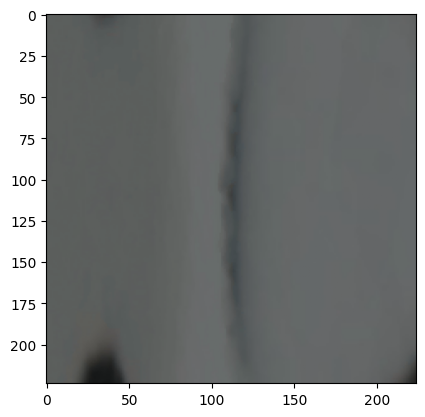

In [51]:
plt.imshow(pm.reconstruct_image(y))

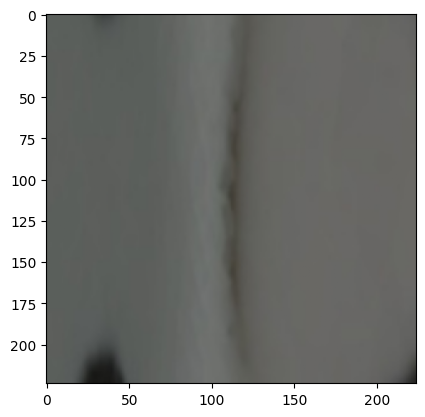

In [52]:
plt.imshow(x[:,:,::-1])

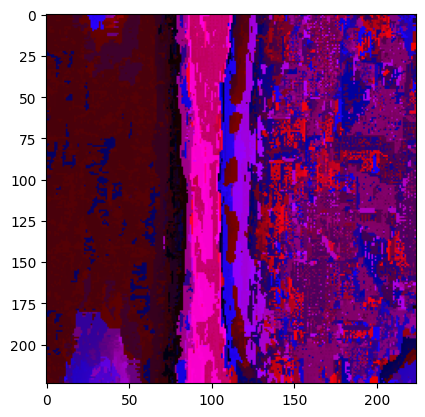

In [53]:
plt.imshow(pm.visualize())